# Examples of how to use corescan_plotting
The python files in corescan_plotting are designed to work with images and data from a Geotek [RXCT](https://www.usgs.gov/centers/pcmsc/labs/core-x-ray-3-d-ct-core-imaging-laboratory?qt-science_support_page_related_con=0#qt-science_support_page_related_con), Geotek Linescan Camera, and Olympus Delta handheld XRF (mounted to the Geotek MSCL) at the USGS Pacific Coastal and Marine [core scanning lab](https://www.usgs.gov/centers/pcmsc/labs/mscll). 

In [8]:
from corescan_plotting import ct, linescan, xrf, strat
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

## CT Images
The code snippet below reads an orthogonal RXCT image (you'll have to substitute in your own file, by running `ct.ct_in()`, it will prompt you to navigate to the file if you don't want to type in the path), automatically crops out the 'air' and straightens the image, and finally plots the cropped and rotated ct image using the matplotlib [inferno](https://matplotlib.org/stable/tutorials/colors/colormaps.html) colormap from intensities of 6000 to 10000, along with a depth ruler on the left-hand side.

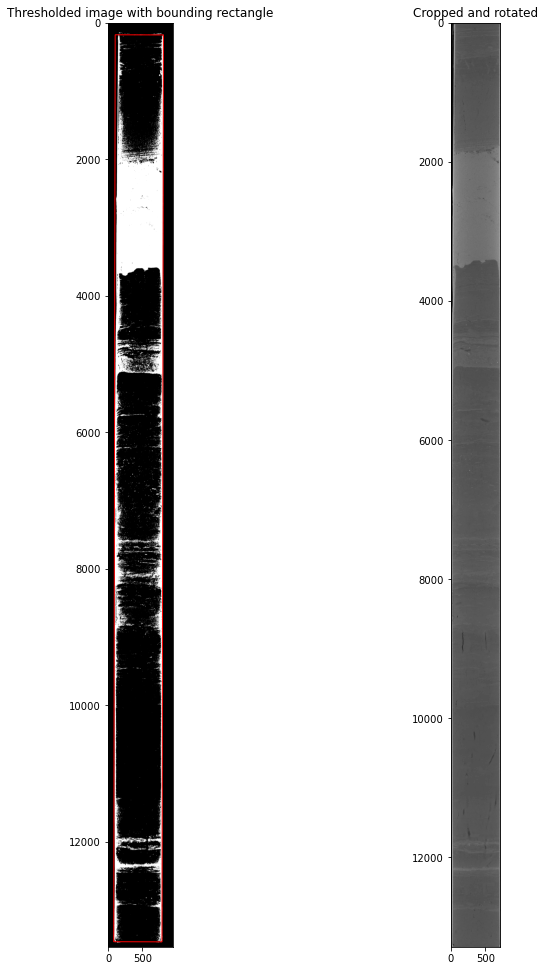

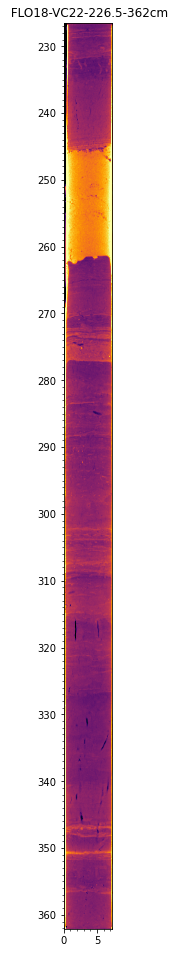

In [10]:
ct_file = "F:\Cascadia\Floras\Floras_XRF\PLOT\VC22_XRF\VC22_226.5-362cm\CT\FLO18-VC22-226.5-362cm_XZView_corrected.TIF"
ct_im, xml = ct.ct_in(ct_file)
ct_im, xml = ct.auto_crop_rotate(ct_im, xml, thresh_val=30, plot=True) # need to manually set threshhold value, typically between 20-100
fig = ct.ct_plot(ct_im, xml, vmin=6000, vmax=10000, cmap=mpl.cm.inferno) # setting the range of ct intensity values here to 6000-10000

### CT XML files
The xml files for these images provide important data, which are stored in a python dictionary. Note that different versions of the Geotek RXCT software prompt for the 'section-depths' in meters while everything else is in cm. The current version of corescan_plotting divides the 'physcial-top' value by 100 to determine the correct depth in cm. If your scan's top-depth is correctly defined in cm, then you you should run a line of code: `xml['physical-top'] = xml['physical-top']*100`

In [14]:
xml

{'geotek-image': '\n  ',
 'image-type': 'giCTOrthogonalView',
 'coreID': ' FLO18-VC22-226.5-362cm',
 'section-number': 3,
 'physical-width': 7.214285714285714,
 'physical-height': 135.59183673469389,
 'physical-top': 22650.0,
 'pixels-per-CM': 98,
 'horizontal-resolution': 98,
 'pixel-width': 707,
 'scan-lines': 13288,
 'comments': ' ',
 'camera-name': ' Thermo Kevex PSX10-65W',
 'average-of': 1,
 'filename': 'FLO18-VC22-226.5-362cm_XZView.TIF',
 'x-ray-voltage': 120,
 'x-ray-current': 319.4,
 'x-ray-spot-size': 55,
 'source-object-distance': 235.73,
 'source-detector-distance': 575.01,
 'detector-CCD-mode': ' 2x2',
 'is-a-sync-scan-image': 0}

### Custom cropping
If you want to crop the image to a subset of depths, you can run the `crop_custom` function. Let's say we want to look just at the tsunami deposit from 240 to 270 cm.

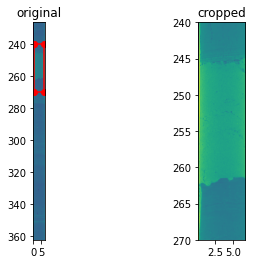

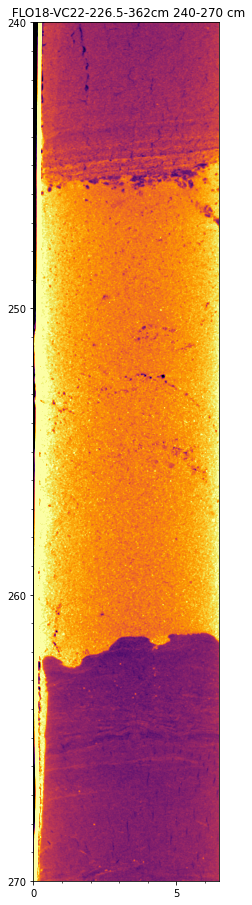

In [19]:
crop_extent = [0.2, 6.7, 240, 270]
crop_im, crop_xml = ct.crop_custom(ct_im, xml, units='cm', bbox=crop_extent, plot=True)
fig = ct.ct_plot(crop_im, crop_xml, vmin=6000, vmax=10000)

### Histogram of ct values
Often useful before doing all you plotting to determine your min and max intensity values, you cat run `ct.ct_histogram()`. Below you can see why setting vmin=6000 and vmax=1000 in above plots gives you a good amount of contrast.

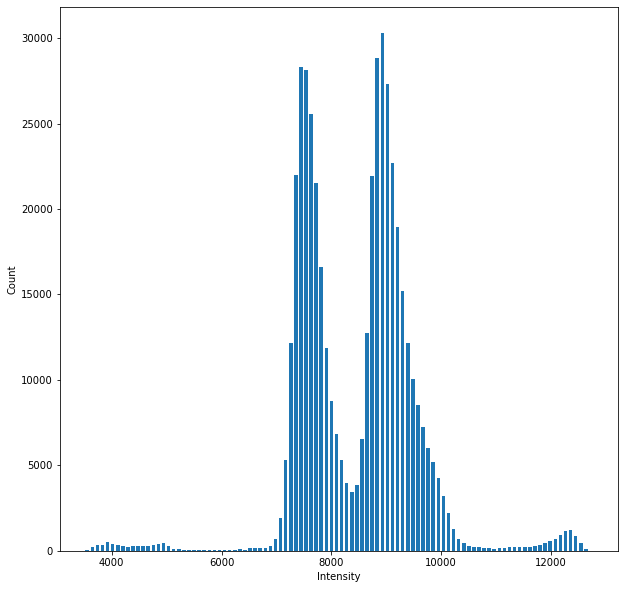

In [21]:
ct.ct_histogram(crop_im)

### Counting laminae
These are mostly just tools to help you visually count laminae. In combination with visual counts, they may be useful, or not...
Here I'll run an auto-count through `autocount_laminae_fft`. If you use allow matplotlib to plot in a qt window (on a mac, try running a cell with `%matplotlib osx`; on Windows: `%matplotlib qt`), you can adjust the sliders at the bottom to adjust intensity, the fourier filter threshold, and the peak/valley picking parameters. 

You may find the `pick_laminae` function a more useful tool to speed up the process of visual counting, as it interactively lets you pick laminae boundaries and then exports the depths to a csv file. 

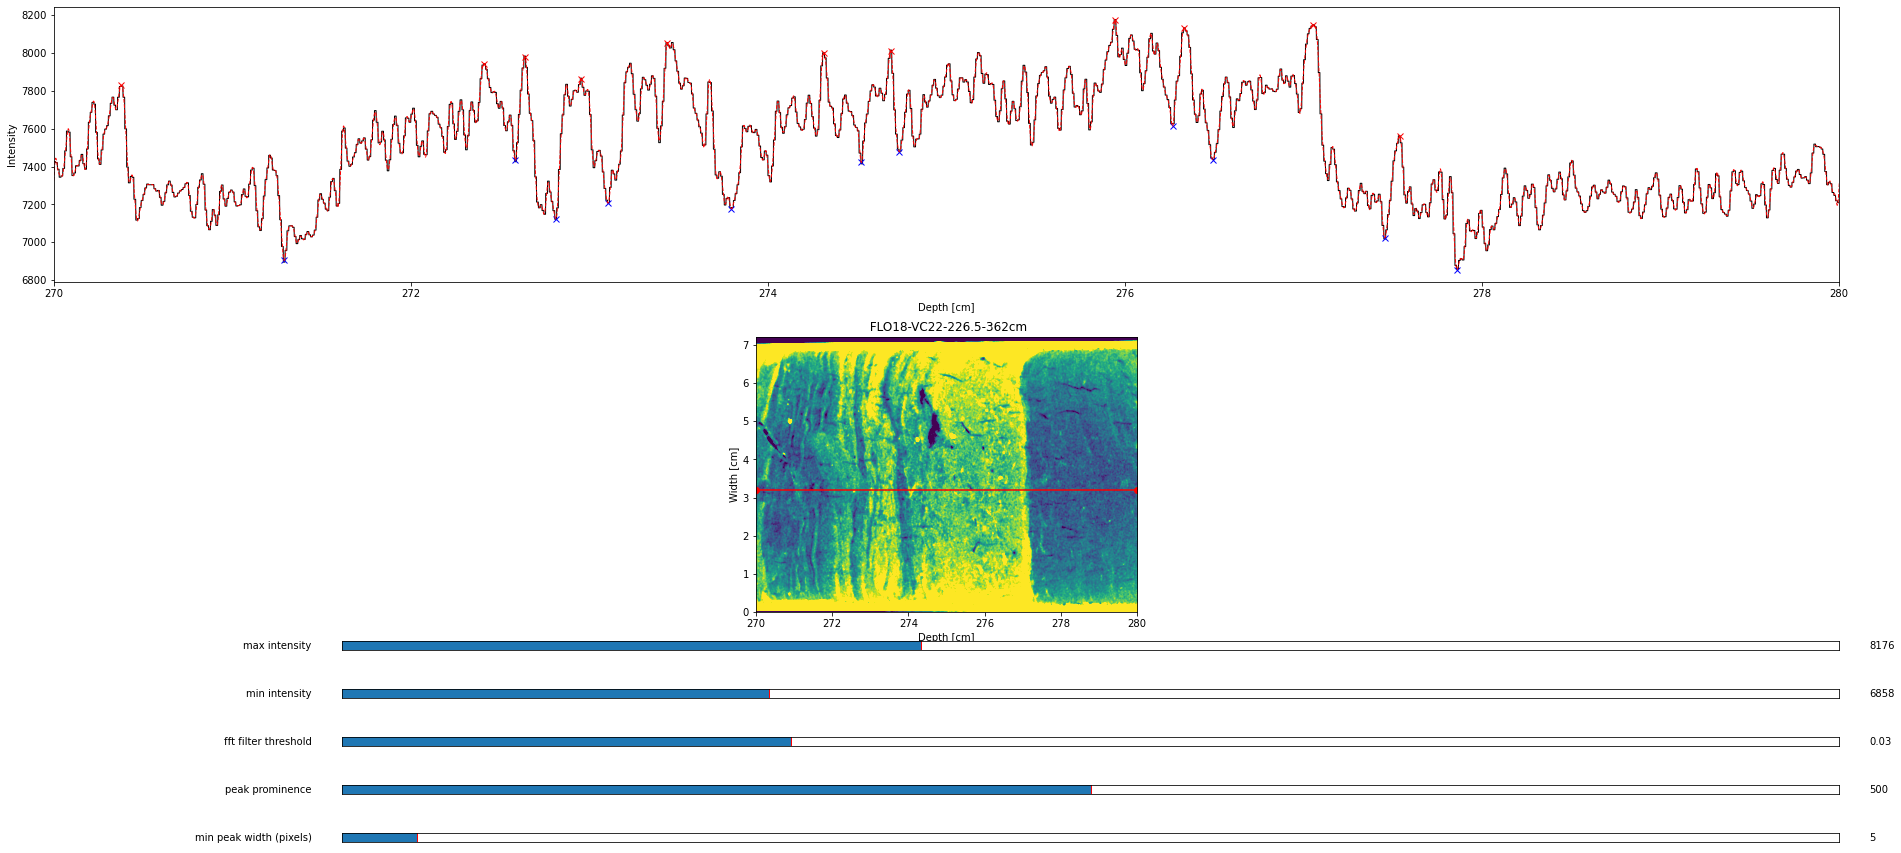

In [25]:
transect = [3.2, 3.2, 270, 280] #defines the line on which to pick peaks and valleys in the form of [x0, x1, y0, y1] and in centimeters
fig, multi, sliders = ct.autocount_laminae_fft(ct_im, xml, layout='horizontal', transect=transect)